# Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('WSN.csv')
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [4]:
print(df.isnull().sum())

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64


In [5]:
df=df.dropna()

In [6]:
df.columns

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Attack type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [8]:
df.tail()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,3
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,3
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,3
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,3
374660,202041,1025,0,202100,0.00000,0,5,0,0,0,0,4,7,689,7,115.00407,0,1.01325,3


In [9]:
x1 = df.drop(labels='Attack type', axis=1)
y1 = df['Attack type']

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({3: 340066, 2: 14596, 0: 10049, 4: 6638, 1: 3312})
OVER SAMPLING DATA COUNT  :  Counter({3: 340066, 1: 340066, 4: 340066, 2: 340066, 0: 340066})


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  1360264
NUMBER OF TEST DATASET      :  340066
TOTAL NUMBER OF DATASET    :  1700330


In [12]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  1360264
NUMBER OF TEST DATASET      :  340066
TOTAL NUMBER OF DATASET    :  1700330


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [15]:
predicted = lr.predict(x_test)

In [16]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF LOGISTIC REGRESSION:\n\n',cr)

THE CLASSIFICATION REPORT OF LOGISTIC REGRESSION:

               precision    recall  f1-score   support

           0       0.34      0.49      0.40     68013
           1       0.76      0.54      0.63     68013
           2       0.32      0.51      0.39     68013
           3       0.88      0.11      0.19     68014
           4       0.47      0.54      0.50     68013

    accuracy                           0.44    340066
   macro avg       0.55      0.44      0.42    340066
weighted avg       0.55      0.44      0.42    340066



In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF LOGISTIC REGRESSION:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF LOGISTIC REGRESSION:


 [[33366     0 24098     0 10549]
 [ 5237 36940 25658     0   178]
 [24556  3133 34815     0  5509]
 [16621  4730 14483  7194 24986]
 [17351  4060  9218   989 36395]]


In [18]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(lr, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [34.84735316 34.45478231 33.77138555 36.04506184 36.79109349]


In [19]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF LOGISTIC REGRESSION IS :",a*100)

THE ACCURACY SCORE OF LOGISTIC REGRESSION IS : 43.72974657860533


In [20]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF LOGISTIC REGRESSION IS :",hl*100)

THE HAMMING LOSS OF LOGISTIC REGRESSION IS : 56.27025342139467


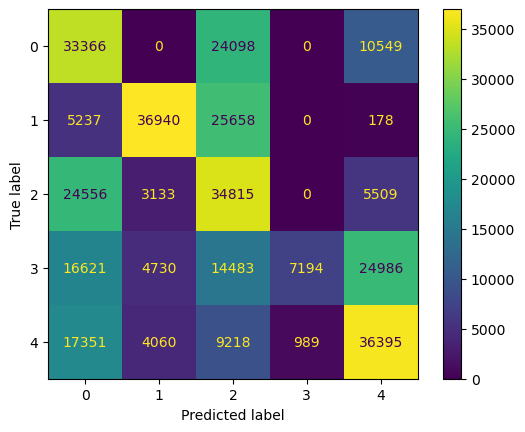

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
CMD.plot()
plt.show()

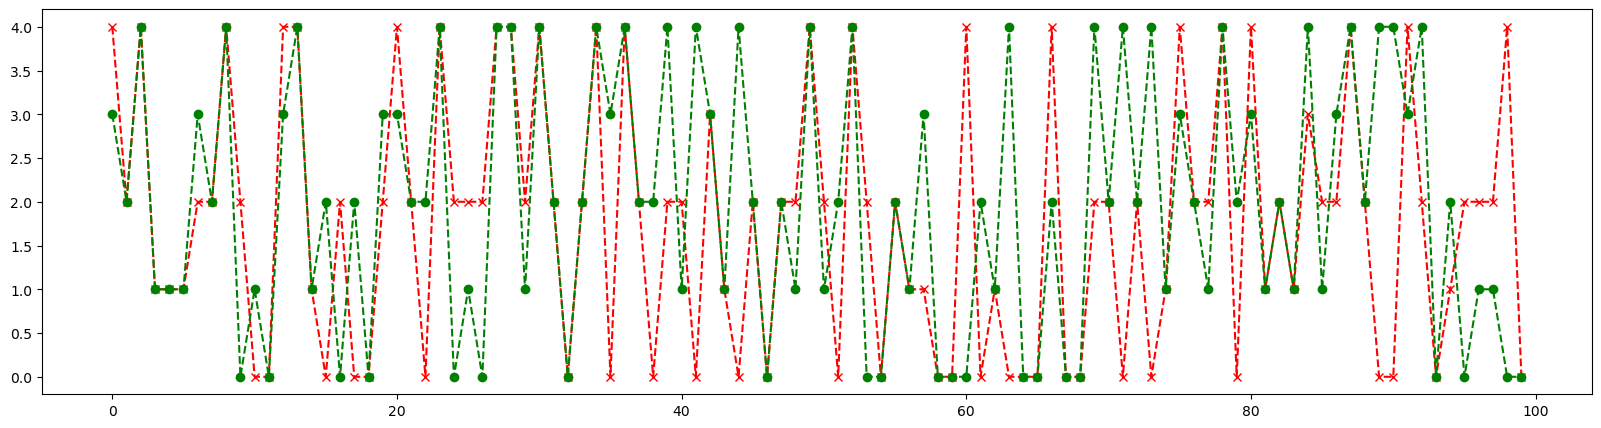

In [22]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [23]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = ['UniqueId', 'Time', 'Is_CH', 'who_CH', 'Dist_To_CH',
                 'ADV_S', 'ADV_R', 'JOIN_S', 'JOIN_R',
                 'SCH_S', 'SCH_R', 'Rank',
                 'DATA_S', 'DATA_R', 'Data_Sent_To_BS',
                 'dist_CH_To_BS', 'send_code', 'Expaned_Energy']

# Print top 5 features
top_features = sorted(zip(importances, feature_names), reverse=True)
for score, name in top_features[:5]:
    print(f"{name}: {score:.4f}")


NameError: name 'model' is not defined